<a href="https://colab.research.google.com/github/debabratmohanty/Down-Syndrome-Classification/blob/main/ML_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data=pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')  # reading the dataset from the provided URL
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


**Q1. Reading the code directly from the URL done**

**Q2. Exploratory data analysis**

In [ ]:
df=data.iloc[:,0:77].copy()
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


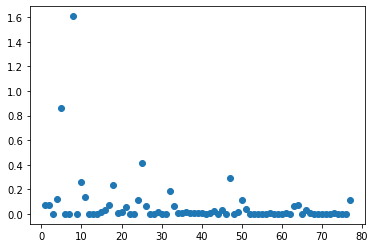

In [ ]:
variance=list(df.var()) # storing variance of the data as list
x=list(range(1, 78, 1))
plt.scatter(x, variance) # plotting variance of each feature to estimate threshold limit
plt.show()
# there are a lot of features with very low variance close to 0-0.05. Hence we can drop those features since they would not contribute much to classification

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(df)
print(var_thres.get_support())
print(sum(var_thres.get_support()))

[ True  True False  True  True False False  True False  True  True False
 False False False False  True  True False False  True False False  True
  True  True False False False False False  True  True False False False
 False False False False False False False False False False  True False
 False  True False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False  True]
20


In [ ]:
pseudo_constant_columns=[column for column in df.columns
                         if column not in df.columns[var_thres.get_support()]]
print(len(pseudo_constant_columns))
useful_column_1=[column for column in df.columns
                 if column in df.columns[var_thres.get_support()]]
print(useful_column_1)

57
['DYRK1A_N', 'ITSN1_N', 'NR1_N', 'NR2A_N', 'pCAMKII_N', 'pELK_N', 'pERK_N', 'pNR2B_N', 'pPKCAB_N', 'BRAF_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'Bcatenin_N', 'SOD1_N', 'pPKCG_N', 'ADARB1_N', 'pCASP9_N', 'PSD95_N', 'CaNA_N']


In [ ]:
#for column in pseudo_constant_columns:       # prints all the columns wih almost 0 variance and hence not useful.
#  print(column)

In [ ]:
null_count_list=list(df.isnull().sum())
#print(null_count_list)
column_list=list(df.columns)
#print(column_list)

useful_column=[]
for i in range(76):
  if null_count_list[i] < 10 and (var_thres.get_support()[i]):
    useful_column.append(column_list[i])        # Creates the required list of useful features with high variance and less than 10 null values
print(useful_column)
print(len(useful_column))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 4, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180, 195, 0, 60, 0, 150, 180, 180, 0]
['DYRK1A_N', 'ITSN1_N', 'NR1_N', 'NR2A_N', 'pCAMKII_N', 'pELK_N', 'pERK_N', 'pNR2B_N', 'pPKCAB_N', 'BRAF_N', 'ERK_N', 'GSK3B_N', 'SOD1_N', 'pPKCG_N', 'ADARB1_N', 'pCASP9_N', 'PSD95_N']
17


**Q2.a. Above printed features are the useful features**

In [ ]:
# PROBLEM 1.B =================================================(droping of correlated features using pearson correlation matrix)

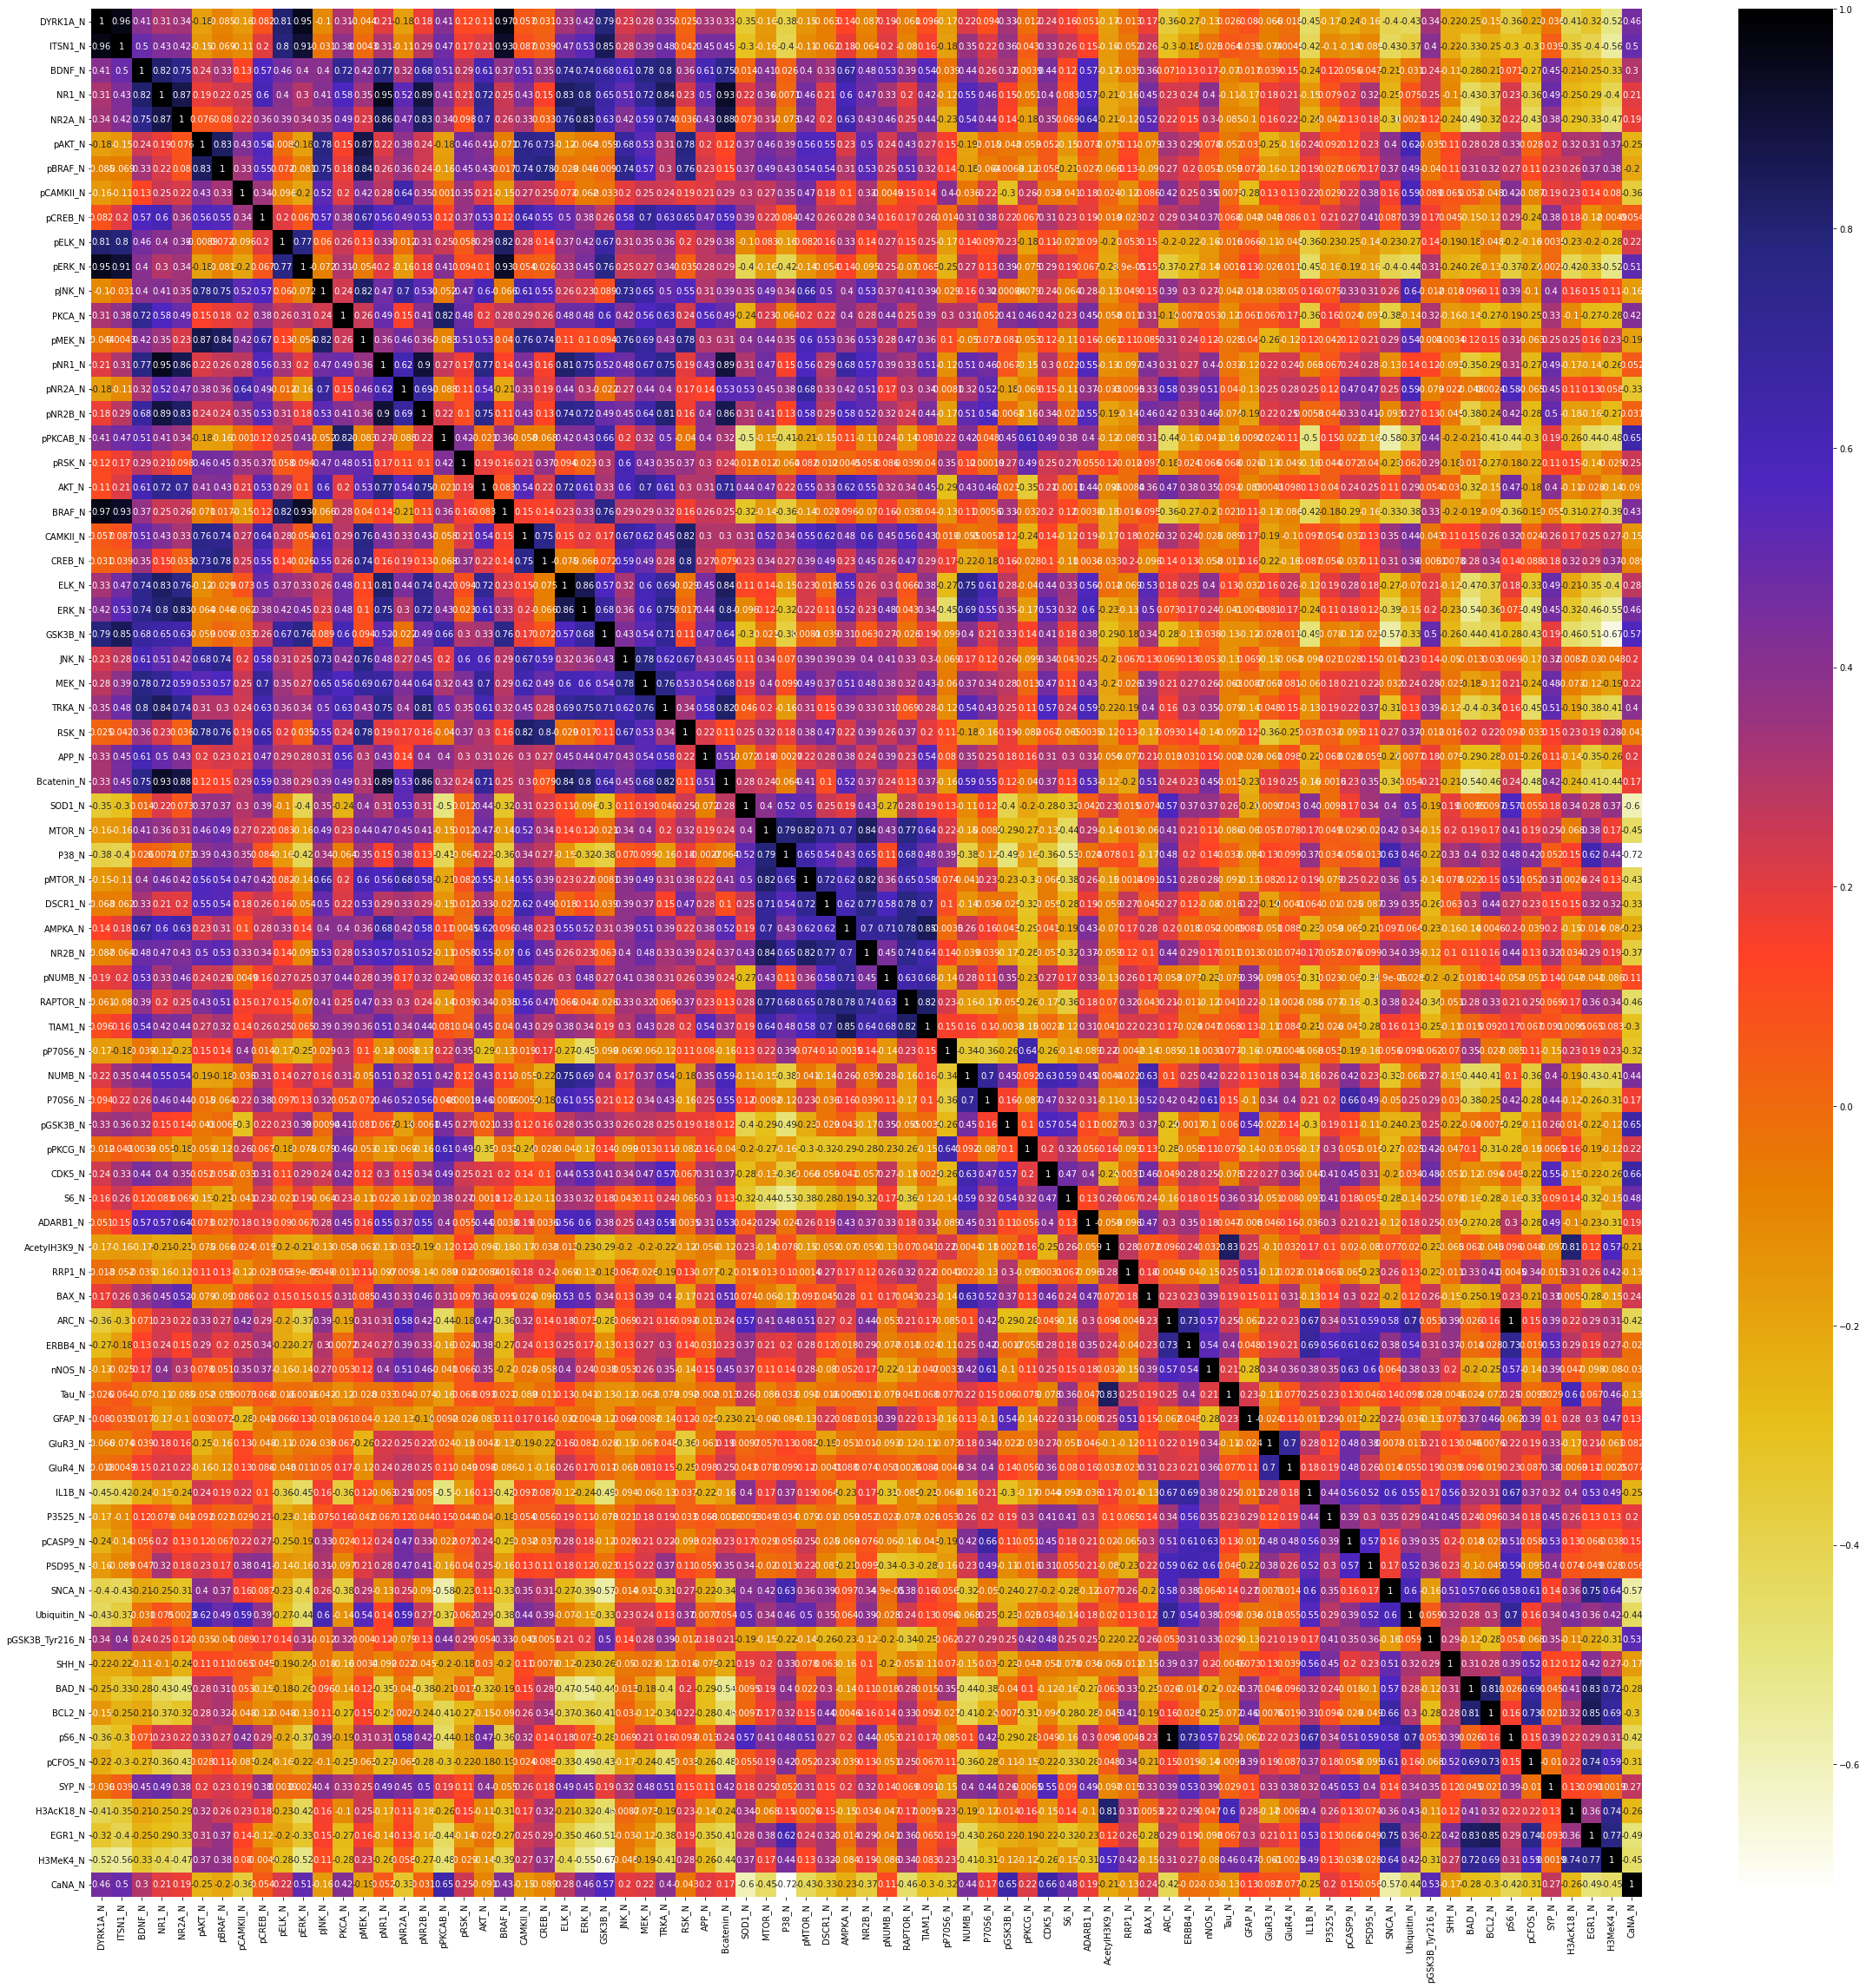

In [ ]:
import seaborn as sns
plt.figure(figsize=(40,40))
correlation=df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
df.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.223812,-0.250262,-0.150564,-0.358480,-0.224427,-0.035929,-0.406055,-0.324198,-0.518361,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.220720,-0.331306,-0.247760,-0.299066,-0.300170,0.039384,-0.354554,-0.403525,-0.558266,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,-0.112984,-0.279752,-0.210969,0.070504,-0.265185,0.454025,-0.207555,-0.247121,-0.331191,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,-0.100915,-0.434723,-0.369966,0.227674,-0.364487,0.486483,-0.253118,-0.287997,-0.404977,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.237932,-0.486259,-0.321165,0.215495,-0.426562,0.377628,-0.292016,-0.326056,-0.468892,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.115625,0.044640,0.020941,0.392329,-0.010451,1.000000,0.131303,0.093264,0.001912,0.273142
H3AcK18_N,-0.406055,-0.354554,-0.207555,-0.253118,-0.292016,0.317508,0.256479,0.229161,0.176392,-0.234061,...,0.121694,0.406723,0.323245,0.224768,0.216137,0.131303,1.000000,0.355167,0.744541,-0.263963
EGR1_N,-0.324198,-0.403525,-0.247121,-0.287997,-0.326056,0.313131,0.366838,0.137520,-0.124001,-0.199574,...,0.417847,0.831734,0.847950,0.291173,0.744911,0.093264,0.355167,1.000000,0.774110,-0.487640
H3MeK4_N,-0.518361,-0.558266,-0.331191,-0.404977,-0.468892,0.372945,0.378236,0.080201,-0.004925,-0.277739,...,0.268944,0.717214,0.688121,0.307902,0.594812,0.001912,0.744541,0.774110,1.000000,-0.452618


In [ ]:
correlated_columns=set()   # stores correlated columns as a set
threshold=0.9    # setting threshold value for correlation to 0.9
correlation_matrix=df.corr()   # setting pearson correlation matrix
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>threshold:
      column_name=correlation_matrix.columns[i]
      correlated_columns.add(column_name)   # adding correlated columns name to the set
print(correlated_columns)   # set of correlated columns needed to be dropped

{'BRAF_N', 'ITSN1_N', 'Bcatenin_N', 'pERK_N', 'pS6_N', 'pNR1_N', 'pNR2B_N'}


**Q2.b. Above features can be dropped due to high correlation**

In [ ]:
data['Genotype'].value_counts()  #This shows that classes are balanced. Control and diseased count is comparable

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

**Q2.c. Above results shows that the classes are balances**

In [ ]:
# problem 3 (iterative imputer from scikit learn)=====================================================
# sources: youtube= Technology cult

**Q3. Iterative Imputation **

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_imputed=df.copy(deep=True)
iterimp=IterativeImputer()
df_imputed.iloc[:,:]=iterimp.fit_transform(df_imputed)
df_imputed.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

In [ ]:
#===============================================================================

**Q5. Grid Search **

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [ ]:
df=df_imputed
df['Genotype']=data['Genotype']
df.head()
X=df.drop(columns='Genotype', axis=1)
Y=df['Genotype']
X=np.asarray(X)
Y=np.asarray(Y)

**GRIDSEARCHCV**

1. linear SVM

In [ ]:
# load SVC model
model=SVC()

# hyperparameters
parameters={
    'kernel':['linear'],
    'C':[5, 6, 7, 8, 9, 10, 15]
}
# grid search
classifier = GridSearchCV(model, parameters, cv=5) # cv is cross validation

# fit data into our gridsearch model
classifier.fit(X, Y)

classifier.cv_results_
best_parameters = classifier.best_params_
print(best_parameters) # prints the best parameters from the gridsearch

highest_accuracy = classifier.best_score_
print(highest_accuracy)

{'C': 7, 'kernel': 'linear'}
0.7714912280701753


2. RBF kernel SVM with kernel width and regularisation as hyperparameter

In [ ]:
# load SVC model
model=SVC()

# hyperparameters
parameters={
    'kernel':['rbf'],
    'C':[5, 6, 7, 8, 9, 10, 15],
    'gamma':[0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4]
}
# grid search
classifier = GridSearchCV(model, parameters, cv=5) # cv is cross validation

# fit data into our gridsearch model
classifier.fit(X, Y)

classifier.cv_results_
best_parameters = classifier.best_params_
print(best_parameters) # prints the best parameters from the gridsearch

highest_accuracy = classifier.best_score_
print(highest_accuracy)


{'C': 15, 'gamma': 0.05, 'kernel': 'rbf'}
0.7271327829377364


3. Neural Network with single ReLU hidden layer and softmax output (hyperparameters: number of neurons and weight decay)  

4. Random Forest (Max tree depth and max number of variables per node as hyperparameter)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


# hyperparameters
parameters={
    'max_depth':[4, 5, 6, 7, 8, 9],
    'max_samples': [ 0.5, 0.75, 0.8, 0.9]
}
# grid search
classifier = GridSearchCV(rf, parameters, cv=5, verbose=2, n_jobs=-1) # cv is cross validation

# fit data into our gridsearch model
classifier.fit(X, Y)

classifier.cv_results_
best_parameters = classifier.best_params_
print(best_parameters) # prints the best parameters from the gridsearch

highest_accuracy = classifier.best_score_
print(highest_accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': 5, 'max_samples': 0.5}
0.7125988992088063


#=================================================

6. Feature importance of Models

In [ ]:
from sklearn import svm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = 0.8)

Text(0.5, 0, 'Permutation Importance')

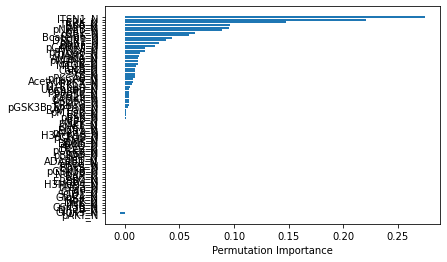

In [ ]:
# linear svm feature importance
from sklearn.inspection import permutation_importance

svc =  SVC(kernel='linear', C=7)
svc.fit(X_train, Y_train)

perm_importance = permutation_importance(svc, X_test, Y_test)

feature_names = df.columns.drop('Genotype')
features = np.array(feature_names)

sorted_idx1 = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx1], perm_importance.importances_mean[sorted_idx1])
plt.xlabel("Permutation Importance")


In [ ]:
print(sorted_idx1)

[ 5 58 38 25 26 27 29 59 32 57 56 55 75 54 53 52 43 45 47 51 22 49 67  6
 70  8 69 68  2 11 71 73 15 74 64 19 13 34 18 23 35 40 66 46 63 21 61 44
 62 65  0 12 50 17 48 72 76 60 33  9 39 37 41 42  4  7 20 14 36 31 10  3
 16 30 28 24  1]


Text(0.5, 0, 'Permutation Importance')

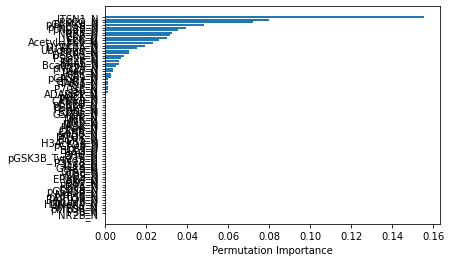

In [ ]:
# rfb svm feature importance
from sklearn.inspection import permutation_importance


svc =  SVC(kernel='rbf', C=15)
svc.fit(X_train, Y_train)

perm_importance = permutation_importance(svc, X_test, Y_test)

feature_names = df.columns.drop('Genotype')
features = np.array(feature_names)

sorted_idx2 = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx2], perm_importance.importances_mean[sorted_idx2])
plt.xlabel("Permutation Importance")

In [ ]:
print(sorted_idx2)

[38 34 35 37 75 39 40 42 43 45 47 51 52 53 54 55 56 57 59 60 61 64 66 67
 68 69 70 71 73 74 33 32 76 22 29 18 11 27 26 25  2 19  6  8 21 12 13 49
 48 44 72 41 58 62 14 30  5 15 31 20  9 63 36 28 65  0 10 50 23 24  4  3
 16 17  7 46  1]


Text(0.5, 0, 'Permutation Importance')

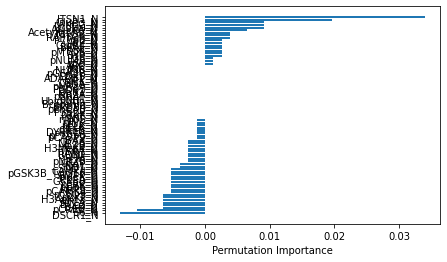

In [ ]:
# Random Fores feature importance
from sklearn.inspection import permutation_importance

rf =  RandomForestClassifier(max_depth=8, max_samples=0.8)
rf.fit(X_train, Y_train)

perm_importance = permutation_importance(rf, X_test, Y_test)

feature_names = df.columns.drop('Genotype')
features = np.array(feature_names)

sorted_idx3 = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx3], perm_importance.importances_mean[sorted_idx3])
plt.xlabel("Permutation Importance")

In [ ]:
print(sorted_idx3)

[36 48  8 68 69 64 73  5 71  7 51 24 10 25 12 13 66 21 32  3 57 16 67  2
 41 28 75 60 38 52 62 42  0 22 23  9 11 55 19 18 61 17 54 31 65 14  6  4
 74 63 15 76 27 49 47 45 43 26 53 70 39 34 72 35 29 20 59 30 44 40 33 50
 37 56 46 58  1]


**It can be seen that feature number 38 is important for all of the models**

**Q 7.    RECURSIVE FEATURE ELIMINATION**
By use of Random Forest Classifier

In [ ]:
from sklearn.feature_selection import RFE
selection = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 30)
# It has been seen in previous section (6) that at most 30 features are of maximum importance

selection.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=30)

In [ ]:
print(selection.get_support())
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = 0.8)
features=feature_names[selection.get_support()]
print(features)
print(len(features))

[ True  True False False  True  True False False False False  True False
 False False  True False False False False False  True False False  True
 False False False False  True False  True False False  True  True  True
  True  True  True  True  True False False False False False  True False
  True  True  True False False  True False False  True False  True False
 False False False  True False  True False False False False False False
  True  True False False  True]
Index(['DYRK1A_N', 'ITSN1_N', 'NR2A_N', 'pAKT_N', 'pERK_N', 'pNR1_N', 'BRAF_N',
       'ELK_N', 'TRKA_N', 'APP_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'pPKCG_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'ARC_N', 'Tau_N', 'GluR3_N', 'PSD95_N',
       'Ubiquitin_N', 'SYP_N', 'H3AcK18_N', 'CaNA_N'],
      dtype='object')
30


In [ ]:
X_train_rfe=selection.transform(X_train)
X_test_rfe=selection.transform(X_test)
from sklearn.metrics import accuracy_score

In [ ]:
def run_randomForest(X_train, X_test, Y_train, Y_test):
  classifier=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
  classifier.fit(X_train, Y_train)
  Y_pred=classifier.predict(X_test)
  print('Accuracy: ', accuracy_score(Y_test, Y_pred))

In [ ]:
run_randomForest(X_train_rfe, X_test_rfe, Y_train, Y_test)

Accuracy:  0.9738562091503268


In [ ]:
run_randomForest(X_train, X_test, Y_train, Y_test)

Accuracy:  0.9869281045751634


**It can clearly be seen from above 2 code sections that after recursive elemination method the accuracy has dropped by almost 1 % from 98.6 to 97.3 but the number of features to be computed has significantly been reduced from 77 to just 30 hence saving a lot of computational power**

Q12. In this Assignment we learned the folowing:
1. Reading code directly from Url
2. Exploratory data analysis of which features are useful or not
3. Finding correlation among features
4. Seeing if classes are balanced
5. Impatative imputation to deal with missing variables
6. Using gridsearch for tuning the hyperparameters of various models like linear SVM, RBF kernel SVM, Random forest.
7. Checking feature imporatance of selected features
8. Using recursive feature elimination



Sources:
Youtube (Krish Naik, CampusX, Siddhardhan)
Stackoverflow
Builtin.com